In [2]:
import pandas as pd

In [3]:
sample_submission = pd.read_csv('./dataset/sample_submission.csv')
vehicles_all = pd.read_csv('./dataset/vehicles_all.csv')
demand_ce = pd.read_csv('./dataset/demand_ce.csv')
cost_profiles = pd.read_csv('./dataset/cost_profiles.csv')

In [4]:
print("Demand Data:")
demand_ce.head()

Demand Data:


,Year,Size,Distance,Demand (km),Carbon emission CO2/kg
0,2023,S1,D1,869181,11677957
1,2023,S1,D2,2597094,11677957
2,2023,S1,D3,3292011,11677957
3,2023,S1,D4,414315,11677957
4,2023,S2,D1,995694,11677957


In [5]:
print("Vehicles Data:")
vehicles_all.head()

Vehicles Data:


,ID,Vehicle,Size,Year,Cost ($),Yearly range (km),Distance,Fuel,Consumption (unit_fuel/km),Emissions (CO2/unit_fuel),Cost ($/unit_fuel),Cost Uncertainty (±%)
0,BEV_S1_2023,BEV,S1,2023,187000,102000,D1,Electricity,0.893043,0.0,0.191791,0
1,BEV_S2_2023,BEV,S2,2023,272000,106000,D1,Electricity,0.896800,0.0,0.191791,0
2,BEV_S4_2023,BEV,S4,2023,395636,118000,D1,Electricity,0.900664,0.0,0.191791,0
3,BEV_S3_2023,BEV,S3,2023,309090,73000,D1,Electricity,0.898003,0.0,0.191791,0
4,BEV_S1_2024,BEV,S1,2024,177650,102000,D1,Electricity,0.893043,0.0,0.184113,2


In [6]:
print("Vehicles Fuels Data:")
vehicles_fuels.head()

Vehicles Fuels Data:


,ID,Fuel,Consumption (unit_fuel/km)
0,BEV_S1_2023,Electricity,0.893043
1,BEV_S1_2024,Electricity,0.893043
2,BEV_S1_2025,Electricity,0.893043
3,BEV_S1_2026,Electricity,0.893043
4,BEV_S1_2027,Electricity,0.868161


In [7]:
print("Fuels Data:")
fuels.head()

Fuels Data:


,Fuel,Year,Emissions (CO2/unit_fuel),Cost ($/unit_fuel),Cost Uncertainty (±%)
0,B20,2023,3.04858,1.220845,0
1,B20,2024,3.04858,1.246802,2
2,B20,2025,3.04858,1.273310,4
3,B20,2026,3.04858,1.300382,6
4,B20,2027,3.04858,1.328030,8


In [8]:
print("Carbon Emissions Data:")
carbon_emissions.head()

Carbon Emissions Data:


,Year,Carbon emission CO2/kg
0,2023,11677957
1,2024,10510161
2,2025,9459145
3,2026,8513230
4,2027,7661907


In [6]:
print("Submission sample :")
sample_submission.head()

Submission sample :


,Year,ID,Num_Vehicles,Type,Fuel,Distance_bucket,Distance_per_vehicle(km)
0,2023,BEV_S1_2023,3,Buy,NaN,NaN,0.0
1,2023,Diesel_S1_2023,36,Buy,NaN,NaN,0.0
2,2023,LNG_S1_2023,34,Buy,NaN,NaN,0.0
3,2023,BEV_S2_2023,4,Buy,NaN,NaN,0.0
4,2023,Diesel_S2_2023,15,Buy,NaN,NaN,0.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

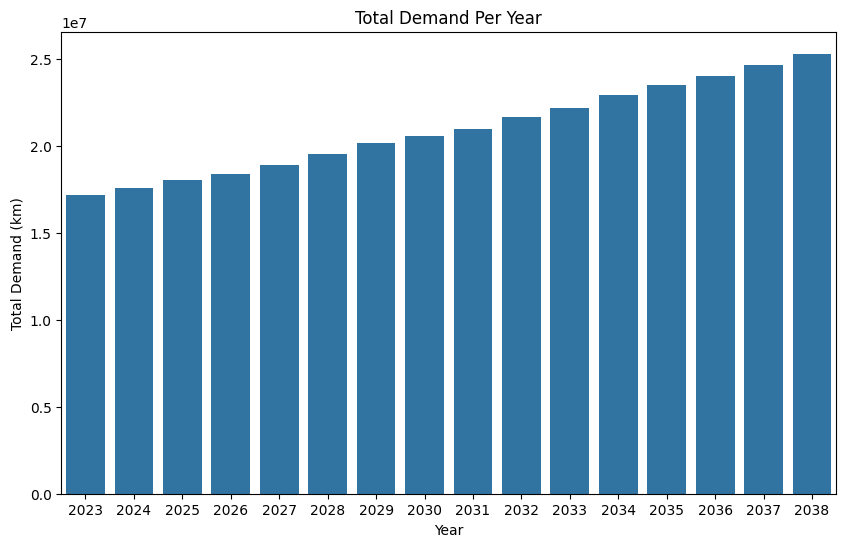

In [8]:
demand_yearly = demand_ce.groupby('Year').sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Demand (km)', data=demand_yearly)
plt.title('Total Demand Per Year')
plt.xlabel('Year')
plt.ylabel('Total Demand (km)')
plt.show()

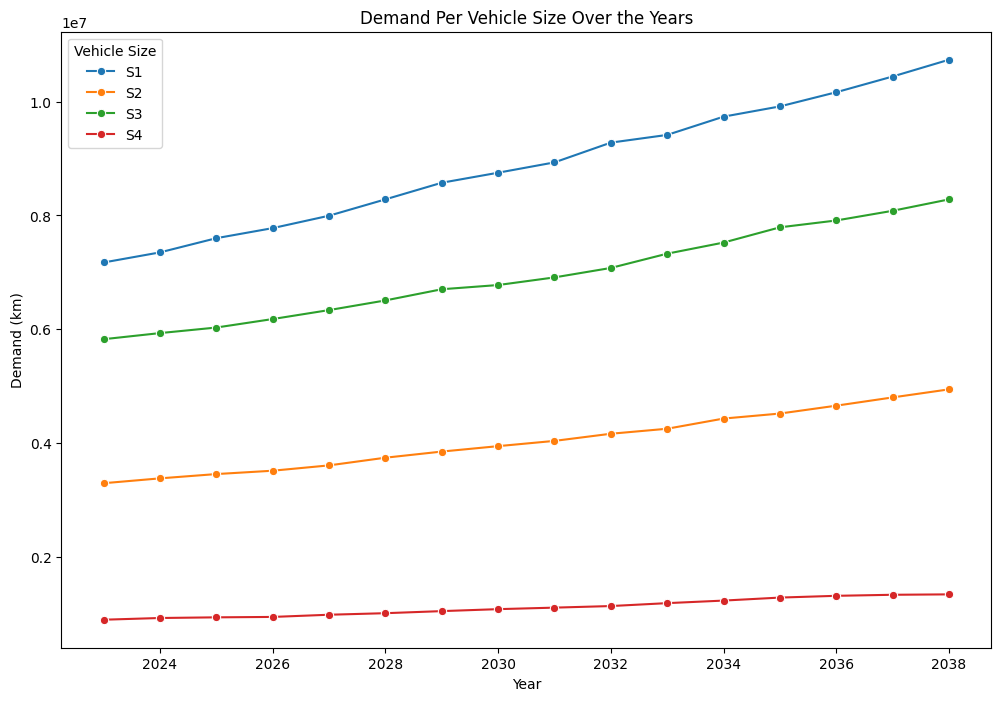

In [9]:
demand_size = demand_ce.groupby(['Year', 'Size']).sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Demand (km)', hue='Size', data=demand_size, marker='o')
plt.title('Demand Per Vehicle Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Demand (km)')
plt.legend(title='Vehicle Size')
plt.show()


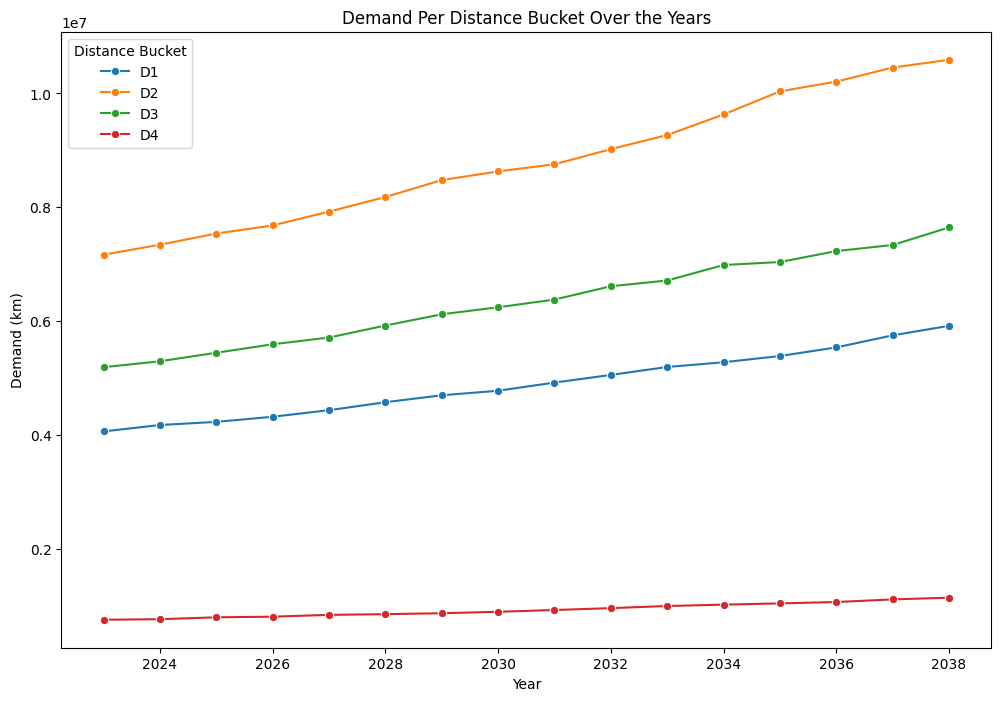

In [10]:
demand_distance = demand_ce.groupby(['Year', 'Distance']).sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Demand (km)', hue='Distance', data=demand_distance, marker='o')
plt.title('Demand Per Distance Bucket Over the Years')
plt.xlabel('Year')
plt.ylabel('Demand (km)')
plt.legend(title='Distance Bucket')
plt.show()

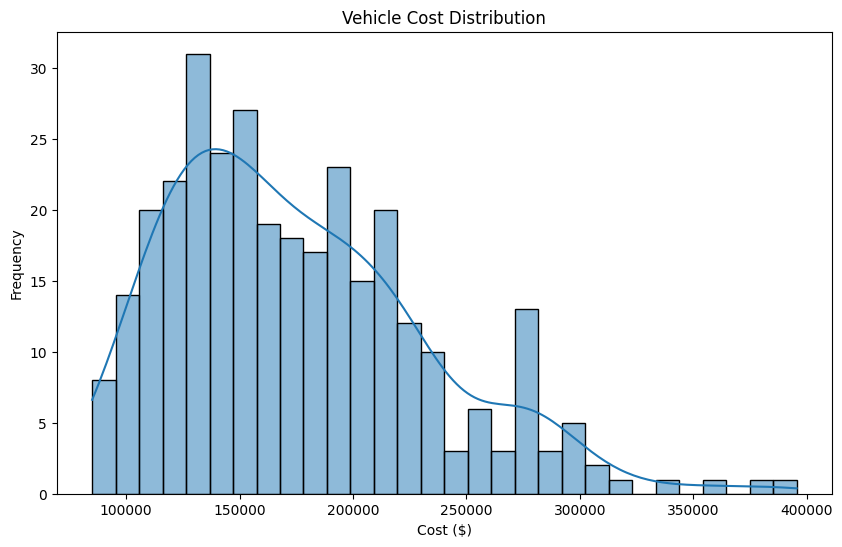

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_all['Cost ($)'], bins=30, kde=True)
plt.title('Vehicle Cost Distribution')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.show()

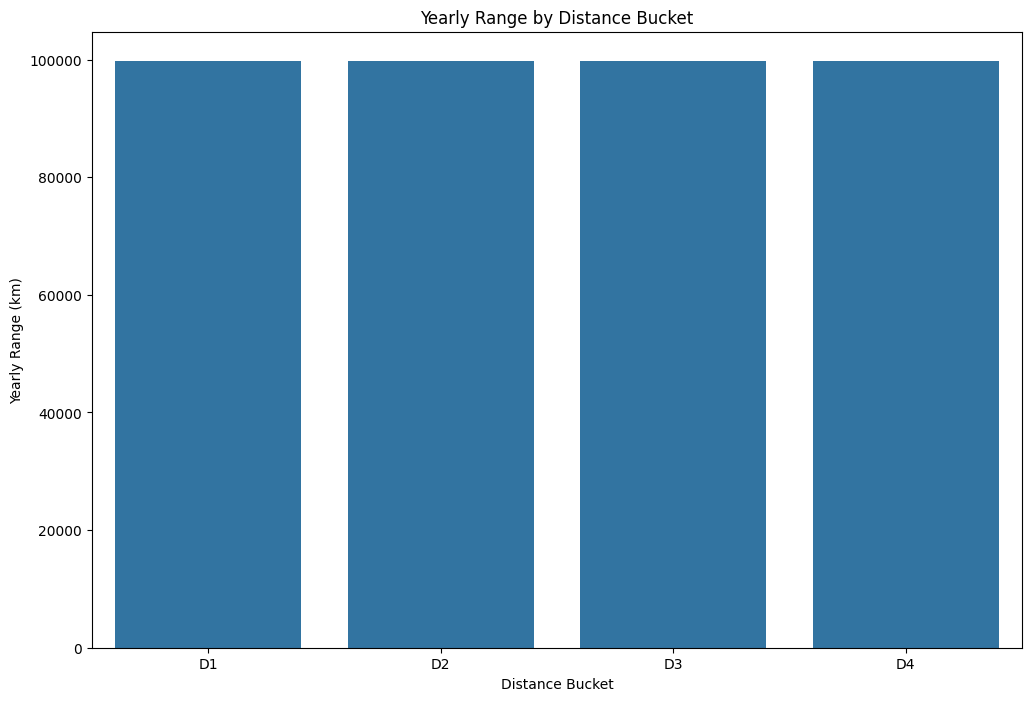

In [12]:
vehicles_distance = vehicles_all.groupby('Distance')['Yearly range (km)'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Distance', y='Yearly range (km)', data=vehicles_distance)
plt.title('Yearly Range by Distance Bucket')
plt.xlabel('Distance Bucket')
plt.ylabel('Yearly Range (km)')
plt.show()

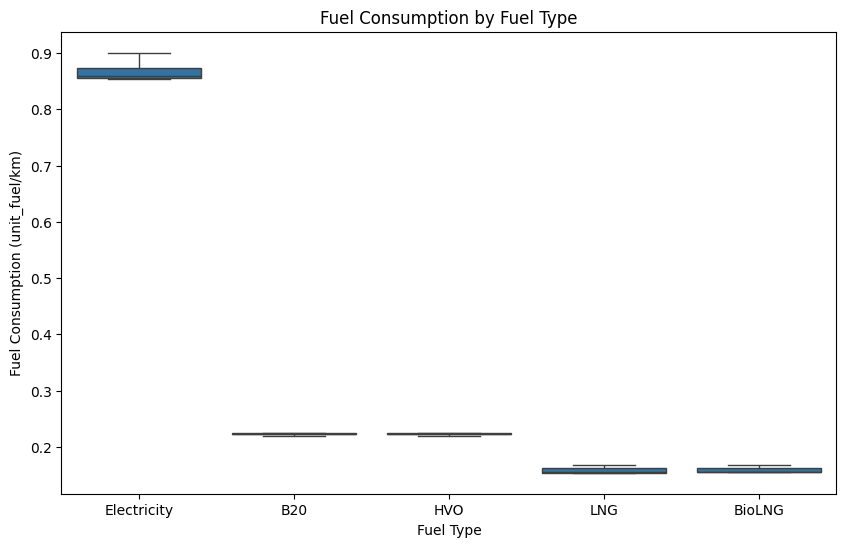

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Consumption (unit_fuel/km)', data=vehicles_all)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (unit_fuel/km)')
plt.show()

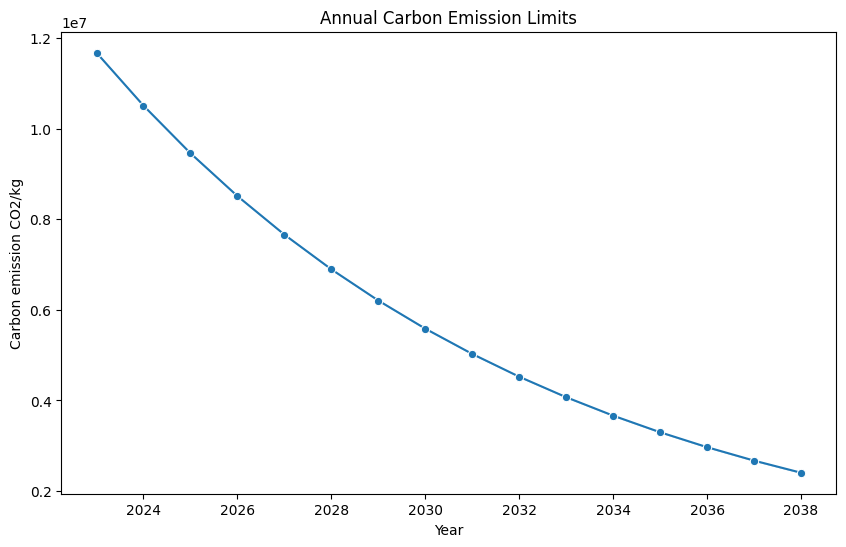

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Carbon emission CO2/kg', data=demand_ce, marker='o')
plt.title('Annual Carbon Emission Limits')
plt.xlabel('Year')
plt.ylabel('Carbon emission CO2/kg')
plt.show()

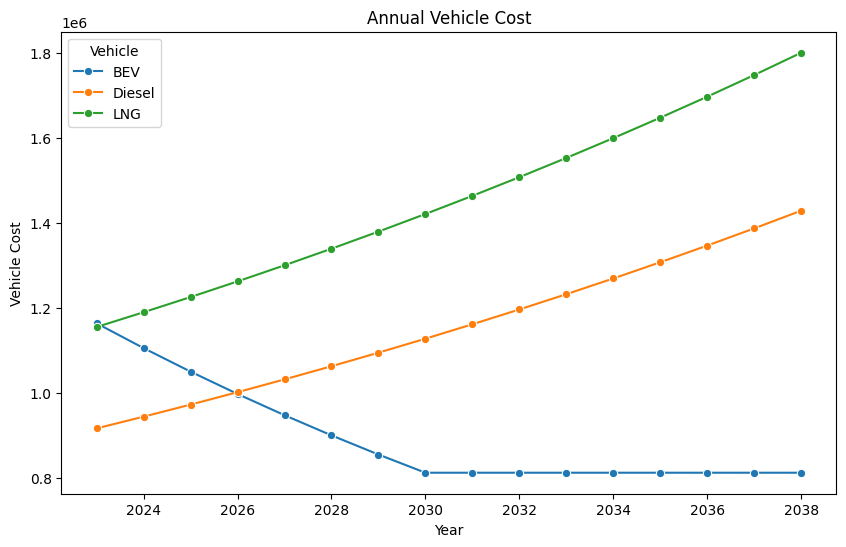

In [15]:
vehicles_dd = vehicles_all.groupby(['Year', 'Vehicle']).sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Cost ($)',hue='Vehicle', data=vehicles_dd, marker='o')
plt.title('Annual Vehicle Cost')
plt.xlabel('Year')
plt.ylabel('Vehicle Cost')
plt.show()

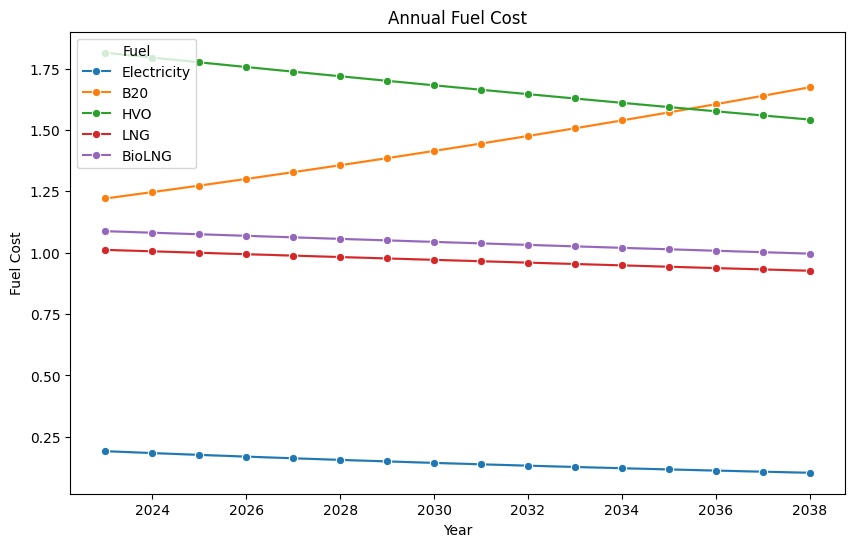

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Cost ($/unit_fuel)',hue='Fuel', data=vehicles_all, marker='o')
plt.title('Annual Fuel Cost')
plt.xlabel('Year')
plt.ylabel('Fuel Cost')
plt.show()

In [18]:
# Create mappings for vehicle size and distance buckets
vehicle_size_mapping = vehicles_all.set_index('ID')['Size'].to_dict()
vehicle_distance_mapping = vehicles_all.set_index('ID')['Distance'].to_dict()

# Example output
print("Vehicle Size Mapping:", vehicle_size_mapping)
print("Vehicle Distance Mapping:", vehicle_distance_mapping)

Vehicle Size Mapping: {'BEV_S1_2023': 'S1', 'BEV_S2_2023': 'S2', 'BEV_S4_2023': 'S4', 'BEV_S3_2023': 'S3', 'BEV_S1_2024': 'S1', 'BEV_S2_2024': 'S2', 'BEV_S4_2024': 'S4', 'BEV_S3_2024': 'S3', 'BEV_S1_2025': 'S1', 'BEV_S2_2025': 'S2', 'BEV_S4_2025': 'S4', 'BEV_S3_2025': 'S3', 'BEV_S1_2026': 'S1', 'BEV_S2_2026': 'S2', 'BEV_S4_2026': 'S4', 'BEV_S3_2026': 'S3', 'BEV_S1_2027': 'S1', 'BEV_S2_2027': 'S2', 'BEV_S4_2027': 'S4', 'BEV_S3_2027': 'S3', 'BEV_S1_2028': 'S1', 'BEV_S2_2028': 'S2', 'BEV_S4_2028': 'S4', 'BEV_S3_2028': 'S3', 'BEV_S1_2029': 'S1', 'BEV_S2_2029': 'S2', 'BEV_S4_2029': 'S4', 'BEV_S3_2029': 'S3', 'BEV_S1_2030': 'S1', 'BEV_S2_2030': 'S2', 'BEV_S4_2030': 'S4', 'BEV_S3_2030': 'S3', 'BEV_S1_2031': 'S1', 'BEV_S2_2031': 'S2', 'BEV_S4_2031': 'S4', 'BEV_S3_2031': 'S3', 'BEV_S1_2032': 'S1', 'BEV_S2_2032': 'S2', 'BEV_S4_2032': 'S4', 'BEV_S3_2032': 'S3', 'BEV_S1_2033': 'S1', 'BEV_S2_2033': 'S2', 'BEV_S4_2033': 'S4', 'BEV_S3_2033': 'S3', 'BEV_S1_2034': 'S1', 'BEV_S2_2034': 'S2', 'BEV_S4_203

In [19]:
# Summarize the updated demand data
demand_summary = demand_ce.groupby(['Year', 'Size', 'Distance'])['Demand (km)'].sum().unstack(fill_value=0)
print("Demand Summary:")
print(demand_summary)

Demand Summary:
Distance        D1       D2       D3      D4
Year Size                                   
2023 S1     869181  2597094  3292011  414315
     S2     995694  1383196   778008  133677
     S3    2183475  2431901  1002466  205426
     S4      14576   754717   118899    1809
2024 S1     877242  2716195  3336604  419981
...            ...      ...      ...     ...
2037 S4      23254  1146520   156518    2414
2038 S1    1254358  3994169  4847871  642216
     S2    1410693  2151804  1187938  190889
     S3    3229278  3297618  1448550  306910
     S4      23437  1148555   161386    2446

[64 rows x 4 columns]


In [45]:
# Example: Matching vehicles to demand
# We'll create a function to match vehicles to the demand for each year, size, and distance bucket.

def match_vehicles_to_demand(demand_ce, vehicle_size_mapping, vehicle_distance_mapping):
    matched_vehicles = []

    for index, row in demand_ce.iterrows():
        year = row['Year']
        size_bucket = row['Size']
        distance_bucket = row['Distance']
        distance_demand_km = row['Demand (km)']
        
        # Find suitable vehicles for this demand
        suitable_vehicles = [vid for vid, sb in vehicle_size_mapping.items() if sb == size_bucket and vehicle_distance_mapping[vid] == distance_bucket]
        
        if suitable_vehicles:
            # Example: Just take the first suitable vehicle for simplicity (this can be improved)
            vehicle_id = suitable_vehicles[0]
            matched_vehicles.append({
                'Year': year,
                'Vehicle_ID': vehicle_id,
                'Size': size_bucket,
                'Distance': distance_bucket,
                'Distance_Demand (km)': distance_demand_km
            })
    
    return matched_vehicles

# Get matched vehicles
matched_vehicles = match_vehicles_to_demand(demand_ce, vehicle_size_mapping, vehicle_distance_mapping)

# Convert to DataFrame for better visualization
matched_vehicles_all = pd.DataFrame(matched_vehicles)
print("Matched Vehicles:")
print(matched_vehicles_all)

Matched Vehicles:
     Year   Vehicle_ID Size Distance  Distance_Demand (km)
0    2023  BEV_S1_2023   S1       D1                869181
1    2023  BEV_S1_2026   S1       D2               2597094
2    2023  BEV_S1_2029   S1       D3               3292011
3    2023  BEV_S1_2032   S1       D4                414315
4    2023  BEV_S2_2023   S2       D1                995694
..    ...          ...  ...      ...                   ...
251  2038  BEV_S4_2032   S4       D4                  2446
252  2038  BEV_S3_2023   S3       D1               3229278
253  2038  BEV_S3_2026   S3       D2               3297618
254  2038  BEV_S3_2029   S3       D3               1448550
255  2038  BEV_S3_2032   S3       D4                306910

[256 rows x 5 columns]


In [30]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpStatus

In [31]:
# Display the first few rows to understand their structure
print("Vehicles Data:")
print(vehicles_all.head())
print("\nDemand Data:")
print(demand_ce.head())

Vehicles Data:
            ID Vehicle Size  Year  Cost ($)  Yearly range (km) Distance  \
0  BEV_S1_2023     BEV   S1  2023    187000             102000       D1   
1  BEV_S2_2023     BEV   S2  2023    272000             106000       D1   
2  BEV_S4_2023     BEV   S4  2023    395636             118000       D1   
3  BEV_S3_2023     BEV   S3  2023    309090              73000       D1   
4  BEV_S1_2024     BEV   S1  2024    177650             102000       D1   

          Fuel  Consumption (unit_fuel/km)  Emissions (CO2/unit_fuel)  \
0  Electricity                    0.893043                        0.0   
1  Electricity                    0.896800                        0.0   
2  Electricity                    0.900664                        0.0   
3  Electricity                    0.898003                        0.0   
4  Electricity                    0.893043                        0.0   

   Cost ($/unit_fuel)  Cost Uncertainty (±%)  
0            0.191791                      0  
1

In [47]:
# Define the optimization problem
prob = LpProblem("Fleet_Transition_Optimization", LpMinimize)

In [48]:
# Decision variables
# x_ijt: Number of vehicles of type i to buy in year t
x = LpVariable.dicts("Buy", [(i, t) for i in vehicles_all['ID'] for t in range(2023, 2039)], lowBound=0, cat='Integer')

# y_ijt: Number of vehicles of type i to use in year t
y = LpVariable.dicts("Use", [(i, t) for i in vehicles_all['ID'] for t in range(2023, 2039)], lowBound=0, cat='Integer')

# z_ijt: Number of vehicles of type i to sell in year t
z = LpVariable.dicts("Sell", [(i, t) for i in vehicles_all['ID'] for t in range(2023, 2039)], lowBound=0, cat='Integer')


In [49]:
# Objective function components
total_cost = lpSum([
    # Purchase cost
    vehicles_all.loc[vehicles_all['ID'] == i, 'Cost ($)'].values[0] * x[i, t] +
    # Maintenance and insurance costs (simplified example, adjust as needed)
    vehicles_all.loc[vehicles_all['ID'] == i, 'Cost ($)'].values[0] * 0.1 * y[i, t] +
    # Fuel cost (simplified example, adjust as needed)
    vehicles_all.loc[vehicles_all['ID'] == i, 'Consumption (unit_fuel/km)'].values[0] *
    vehicles_all.loc[vehicles_all['ID'] == i, 'Cost ($/unit_fuel)'].values[0] * y[i, t] 
    # Resale value (simplified example, adjust as needed)
    -vehicles_all.loc[vehicles_all['ID'] == i, 'Cost ($)'].values[0] * 0.2 * z[i, t]
    for i in vehicles_all['ID'] for t in range(2023, 2039)
])

# Set the objective
prob += total_cost


In [50]:
# Constraint: Meet demand for each size and distance bucket
for index, row in demand_ce.iterrows():
    year = row['Year']
    size_bucket = row['Size']
    distance_bucket = row['Distance']
    demand = row['Demand (km)']
    
    suitable_vehicles = vehicles_all[(vehicles_all['Size'] == size_bucket) & (vehicles_all['Distance'] == distance_bucket)]
    
    prob += lpSum([y[i, year] for i in suitable_vehicles['ID']]) >= demand

# Constraint: Stay within the yearly carbon emission limits
for year in demand_ce['Year'].unique():
    carbon_limit = demand_ce[demand_ce['Year'] == year]['Carbon emission CO2/kg'].values[0]
    
    prob += lpSum([
        vehicles_all.loc[vehicles_all['ID'] == i, 'Consumption (unit_fuel/km)'].values[0] *
        vehicles_all.loc[vehicles_all['ID'] == i, 'Emissions (CO2/unit_fuel)'].values[0] * y[i, year]
        for i in vehicles_all['ID']
    ]) <= carbon_limit

# Constraint: Vehicles can only be bought in the specified year
for i in vehicles_all['ID']:
    year = vehicles_all.loc[vehicles_all['ID'] == i, 'Year'].values[0]
    for t in range(2023, 2039):
        if t != year:
            prob += x[i, t] == 0

# Constraint: Vehicles have a lifespan of 10 years
for i in vehicles_all['ID']:
    year = vehicles_all.loc[vehicles_all['ID'] == i, 'Year'].values[0]
    for t in range(year + 10, 2039):
        prob += y[i, t] == 0

# Constraint: At most 20% of the fleet can be sold each year
for t in range(2023, 2039):
    prob += lpSum([z[i, t] for i in vehicles_all['ID']]) <= 0.2 * lpSum([y[i, t] for i in vehicles_all['ID']])


In [51]:
# Solve the problem
prob.solve()

# Print the status of the solution
print("Status:", LpStatus[prob.status])

# Print the decision variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Infeasible
Buy_('BEV_S1_2023',_2023) = 0.0
Buy_('BEV_S1_2023',_2024) = 0.0
Buy_('BEV_S1_2023',_2025) = 0.0
Buy_('BEV_S1_2023',_2026) = 0.0
Buy_('BEV_S1_2023',_2027) = 0.0
Buy_('BEV_S1_2023',_2028) = 0.0
Buy_('BEV_S1_2023',_2029) = 0.0
Buy_('BEV_S1_2023',_2030) = 0.0
Buy_('BEV_S1_2023',_2031) = 0.0
Buy_('BEV_S1_2023',_2032) = 0.0
Buy_('BEV_S1_2023',_2033) = 0.0
Buy_('BEV_S1_2023',_2034) = 0.0
Buy_('BEV_S1_2023',_2035) = 0.0
Buy_('BEV_S1_2023',_2036) = 0.0
Buy_('BEV_S1_2023',_2037) = 0.0
Buy_('BEV_S1_2023',_2038) = 0.0
Buy_('BEV_S1_2024',_2023) = 0.0
Buy_('BEV_S1_2024',_2024) = 0.0
Buy_('BEV_S1_2024',_2025) = 0.0
Buy_('BEV_S1_2024',_2026) = 0.0
Buy_('BEV_S1_2024',_2027) = 0.0
Buy_('BEV_S1_2024',_2028) = 0.0
Buy_('BEV_S1_2024',_2029) = 0.0
Buy_('BEV_S1_2024',_2030) = 0.0
Buy_('BEV_S1_2024',_2031) = 0.0
Buy_('BEV_S1_2024',_2032) = 0.0
Buy_('BEV_S1_2024',_2033) = 0.0
Buy_('BEV_S1_2024',_2034) = 0.0
Buy_('BEV_S1_2024',_2035) = 0.0
Buy_('BEV_S1_2024',_2036) = 0.0
Buy_('BEV_S1_2024',_2